# Описание проекта
    Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
    В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

***Описание данных***

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

**Сборный проект-1**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
from scipy import stats as st

### 1. Откроем файл с данными и изучим общую информацию

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv') 
except:
    data = pd.read_csv('games.csv')

### 2. Подготовим данные

Выведем на экран первые строки

In [3]:
data.head(10) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Приведем названия столбцов к нижнему регистру:

In [4]:
data = data.rename(columns = 
                   {'Name': 'name',
                    'Platform': 'platform',
                    'Year_of_Release': 'year_of_release',
                    'Genre': 'genre', 'NA_sales': 'na_sales',
                    'EU_sales': 'eu_sales',
                    'JP_sales': 'jp_sales',
                    'Other_sales': 'other_sales',
                    'Critic_Score': 'critic_score',
                    'User_Score': 'user_score',
                    'Rating': 'rating'}
                  )    

Выведем информацию о датафрейме

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Изменим тип данных в столбце year_of_release, чтобы год был целым числом

In [6]:
data['year_of_release'] = data['year_of_release'].astype('Int64') 

Проверим наличие явных дубликатов

In [7]:
data.duplicated().sum()

0

Проверим дубликаты "Имя-Платформа"

In [8]:
# проверим неявные дубликаты в столбцах name и platform 
data.duplicated(subset=['name', 'platform']).sum()

5

In [9]:
duplicated_df = data[data.duplicated(subset=['name', 'platform'], keep=False)]
print(duplicated_df)

                              name platform  year_of_release     genre  \
604                  Madden NFL 13      PS3             2012    Sports   
659                            NaN      GEN             1993       NaN   
1190   Need for Speed: Most Wanted     X360             2012    Racing   
1591   Need for Speed: Most Wanted     X360             2005    Racing   
1745            Sonic the Hedgehog      PS3             2006  Platform   
4127            Sonic the Hedgehog      PS3             <NA>  Platform   
5972   Need for Speed: Most Wanted       PC             2005    Racing   
11715  Need for Speed: Most Wanted       PC             2012    Racing   
14244                          NaN      GEN             1993       NaN   
16230                Madden NFL 13      PS3             2012    Sports   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
604        2.11      0.22      0.00         0.23          83.0        5.5   
659        1.78      0.53      

Удалим строки 659 и 14244 - в них практически нет информации
1190 и 11715  NFS не выходил в 2012 году
4127 она без года релиза и скорее всего дублирует Sonic the Hedgehog      PS3 2006г.
16230  дублирует Madden NFL 13      PS3             2012г

In [10]:
data.drop([659, 1190, 4127,11715,  14244, 16230], axis=0, inplace=True)

In [11]:
data.duplicated(subset=['name', 'platform']).sum()

0

In [12]:
print(data.isna().sum()) # проверяем наличие пропусков и их количество

name                  0
platform              0
year_of_release     268
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64


проверим уникальные значения в некоторых столбцах

In [13]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [14]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Пропуски в name совпадают с пропусками в genre и в трех столбцах с рейтингами, имеет смысл удалить эти строки:

In [15]:
data = data.dropna(subset=['name'])
data.shape

(16709, 11)

Найдем пропуски в 'critic_score', 'user_score', 'rating' и заменим их на маркер 'unknown'. В этих столбцах у нас рейтинги и такая замена не изменит данных в остальных столбцах. Далее, при обработке данных в этих столбцах будем исключать маркер.

In [16]:
# перебор названий столбцов в цикле и замена пропущенных значений на 'unknown'
columns_to_replace = ['critic_score', 'user_score', 'rating'] # список столбцов, в которых будем производить замену

for column in columns_to_replace:  
    data[column] = data[column].fillna('unknown')
print(data.isna().sum())    

name                 0
platform             0
year_of_release    268
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64


In [17]:
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Посмотрим количество уникальных названий игр

In [18]:
len(list(data['name'].unique())) 

11559

Количество уникальных названий игр значительно меньше общего количества строк, следовательно, игры повторяются. Скорее всего,  одни и те же игры выходят на разных платформах. Заменим пропуски в годах релиза игр в строках, где их нет, на максимально значение из строк с этой игрой.

Сохраним в отдельную таблицу два столбца 

In [19]:
df_tmp = data[['name', 'year_of_release']] 
data['year_of_release'] = df_tmp.groupby('name').transform(lambda x: x.fillna(x.max())) # если в строке пропущен год релиза, но игра встречается в других строках, где год указан, присваеваем максимальное значение года.

In [20]:
data.isna().sum()

name                 0
platform             0
year_of_release    146
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

Оставшиеся пропуски в годах релиза корректировать не будем, так как если присвоить им какие-то конкретные значения они могут повлиять на результаты анализа. С большой долей вероятности, можно утверждать, что эти пропуски обусловлены человеческим фактором и распределены рандомно по всему датафрейму и, поэтому отсутствие этих данных, минимально скажется на результатах нашего анализа.

Посмотрим строки, в которых в столбце user_score встречается tbd

In [21]:
data[data.user_score == "tbd"] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,unknown,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,unknown,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,unknown,tbd,E


Всего строк со значение tbd 2424. Это довольно значимая величина. Не будем удалять эти значения, так как в строках, где они встречаются может быть значимая информация. В дальнейшем при обработке столбца user_score будем удалять эти значения.

Посчитаем суммарные продажи во всех регионах и сохраним их в отдельный столбец total_sales

In [22]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')

Мы провели предобработку данных и подготовили их для дальнейшего анализа. 

Были удалены пропуски, проверены дубликаты, изменены типы данных, изучены непонятные данные и сформирован дополнительный столбец, который будет необходим в дальнейшей работе.

Основные причины появления пропусков и дубликатов:

человеческий фактор, выходы релизов под теми же названиями, но на других платформах и в другие годы. 

Так же отдельно хотелось бы отметить, что появление пропусков в столбце rating может быть связано с расположением рейтингового агенства в США и, что могло повлиять на обработку данных, которые в меньше мерей интересовали сотрудников агенства.

### 3. Проведем исследовательский анализ данных.

Выясним сколько игр выпускалось в разные годы

In [23]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     339
2000     350
2001     484
2002     845
2003     785
2004     765
2005     947
2006    1019
2007    1202
2008    1440
2009    1431
2010    1271
2011    1153
2012     659
2013     547
2014     582
2015     606
2016     502
Name: name, dtype: int64

До 1993 года большой динамики в росте количества игр не наблюдается. Основной рост количества игр приходится на период до 2008 года, после чего начинается спад. Возможно на индустрии сказался экономический кризис 2008 года и динамическое развитие мобильных платформ в последующие годы.

Посмотрим, как зависят продажи в зависимости от жанров:

<AxesSubplot:xlabel='total_sales', ylabel='genre'>

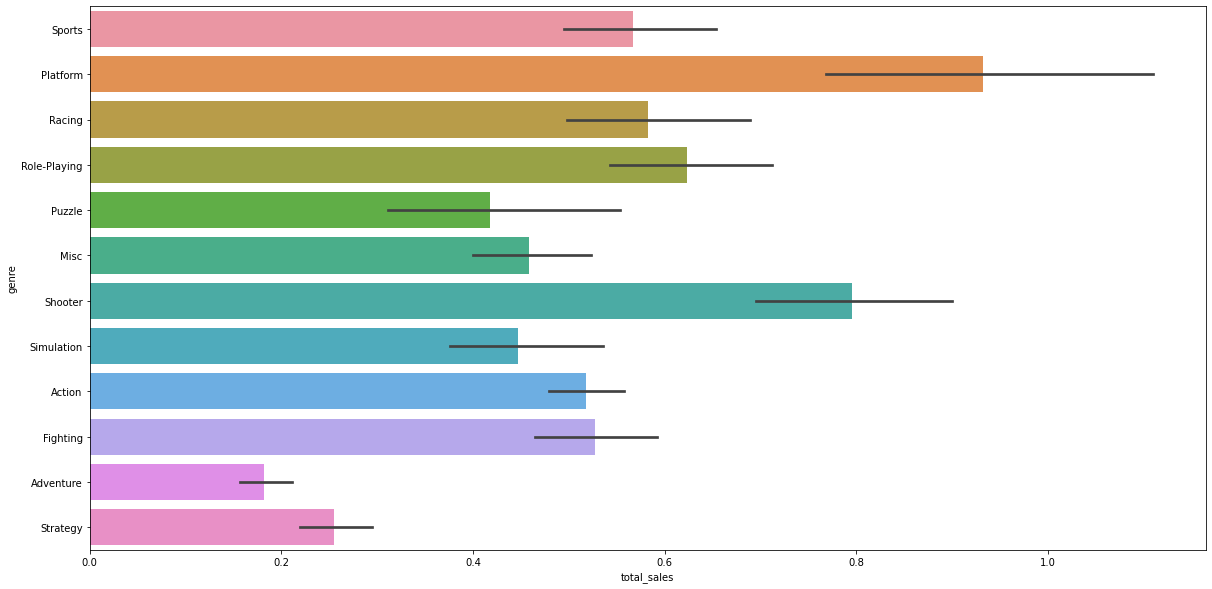

In [24]:
plt.figure(figsize=[20, 10])
sns.barplot(data=data, x='total_sales', y='genre')

Явные лидеры: Platform и Shooter

Посмотрим, как менялась картина по продажам на разных платформах за весь период отраженный в датафрейме.

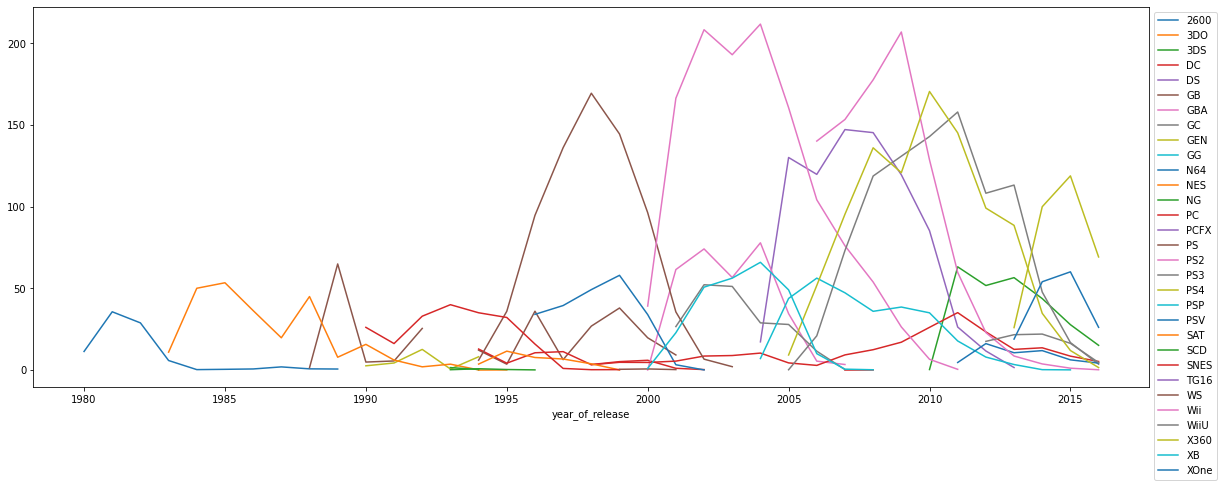

In [25]:
data\
    .pivot_table(index = 'year_of_release', columns = 'platform', values= 'total_sales', aggfunc = 'sum')\
    .plot(figsize = (20, 7))
plt.legend(bbox_to_anchor=(1, 1))

Средний срок платформы на рынке 7-10 лет. При этом абсолютное большинство по продажам приходится на период с 2005 года по 2010 год. После этого начинается спад в этой индустрии и к 2016 году в явных фаворитах остались несколько платформ PS4, PS3, 3DS, а так же со сравнительно небольшими продажами, но с завидным постоянством PC. В целом можно сказать, что наиболее стабильным игроком на рынке является PS, которая обновляет свою платформу каждые 5-7 лет. 

Для анализа сделаем срез по годам. Учитывая среднюю продолжительность жизни платформы на рынке, отбросим данные до 2010 года.

Сделаем срез до 2014 года

In [26]:
data_rating = data.query('year_of_release >= 2014') # сохраним этот срез в отдельную таблицу

Найдем 10 платформ с самыми большими продажами

<AxesSubplot:xlabel='year_of_release'>

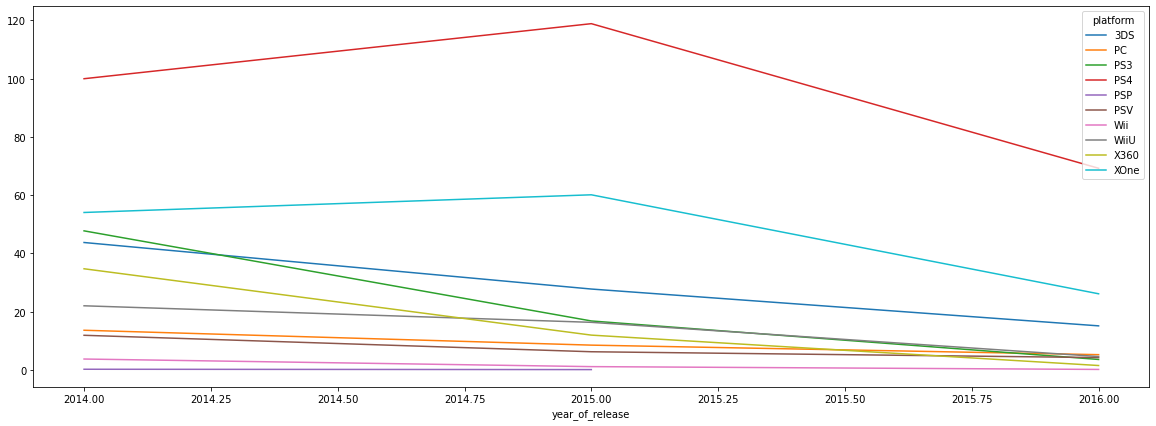

In [27]:
platform_total_sales = data_rating.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
    .nlargest(10, 'total_sales').index 

data_rating.query('platform in @platform_total_sales')\
    .pivot_table(index = 'year_of_release', columns = 'platform', values= 'total_sales', aggfunc = 'sum')\
    .plot(figsize = (20, 7))

In [28]:
platform_total_sales

Index(['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP'], dtype='object', name='platform')

Можно ожидать, что PS4 еще 2-4 года будет занимать монопольное положение  и выпустит через 2-3 года новую платформу, которая в последстии займет место PS4. Так же имеет смысл заниматься продвижением игр на XOne и 3DS, можно ожидать, что ближайшие 2-4 года продажи будут на хорошем уровне. 

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам из топ-10.


(0.0, 2.1)

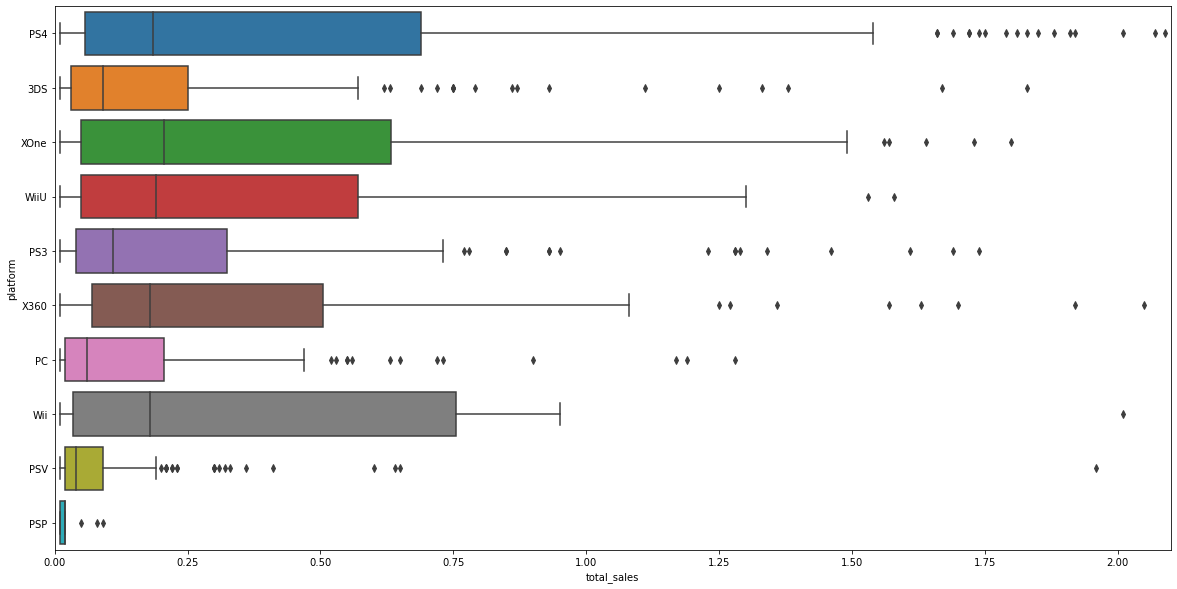

In [29]:
plt.figure(figsize=[20, 10])
sns.boxplot(data=data_rating.query('platform in @platform_total_sales'), x='total_sales', y='platform')
plt.xlim(0, 2.1)


Используем describe(), чтобы изучить информацию

In [30]:
dfd = data_rating.query('platform in @platform_total_sales')
dfd = dfd[['platform', 'total_sales']]

dfd.groupby('platform').describe() 

total_sales                                                        
               count      mean       std   min     25%    50%     75%    max
platform                                                                    
3DS            212.0  0.408868  1.188368  0.01  0.0300  0.090  0.2500  11.68
PC             152.0  0.180263  0.328559  0.01  0.0200  0.060  0.2050   3.05
PS3            219.0  0.311324  0.633059  0.01  0.0400  0.110  0.3250   5.27
PS4            376.0  0.766356  1.614969  0.01  0.0575  0.185  0.6900  14.63
PSP             13.0  0.027692  0.027735  0.01  0.0100  0.020  0.0200   0.09
PSV            295.0  0.075932  0.141591  0.01  0.0200  0.040  0.0900   1.96
Wii             11.0  0.460909  0.625451  0.01  0.0350  0.180  0.7550   2.01
WiiU            73.0  0.588767  1.161467  0.01  0.0500  0.190  0.5700   7.09
X360           111.0  0.434414  0.628967  0.01  0.0700  0.180  0.5050   4.28
XOne           228.0  0.615614  1.046513  0.01  0.0500  0.205  0.6325   7.39

По верхниму квартилю у нас есть лидеры: Wii (0,755), PS4(0.69) и XOne(0.6325) при этом средние медианные значения находятся приблизительно на одном уровне. Верхняя границы самые большие у PS4 и 3DS.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [31]:
# создадим функцию для построения диаграммы рассеивания с исключением значений unknown и tbd и выводом коррелляции:
def reviews(data,column1, column2, column3, name_platform):
    data_x = data[[column1, column2, column3]]
    data_x = data_x[data_x[column1] == name_platform]
    data_x = data_x[(data_x[column2] != 'unknown') & (data_x[column2] != 'tbd')]
    data_x[column2] = data_x[column2].astype('float')
    data_x[column3] = data_x[column3].astype('float')
    data_x = data_x.sort_values(by=column2)
    plt.figure(figsize=[20, 10])
    sns.scatterplot(data = data_x, x = column2, y = column3)
    sns.set(rc={'figure.figsize':(10,5)})
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    print('Корреляция равна:', data_x[column2].corr(data_x[column3]))
    return 

Для X360

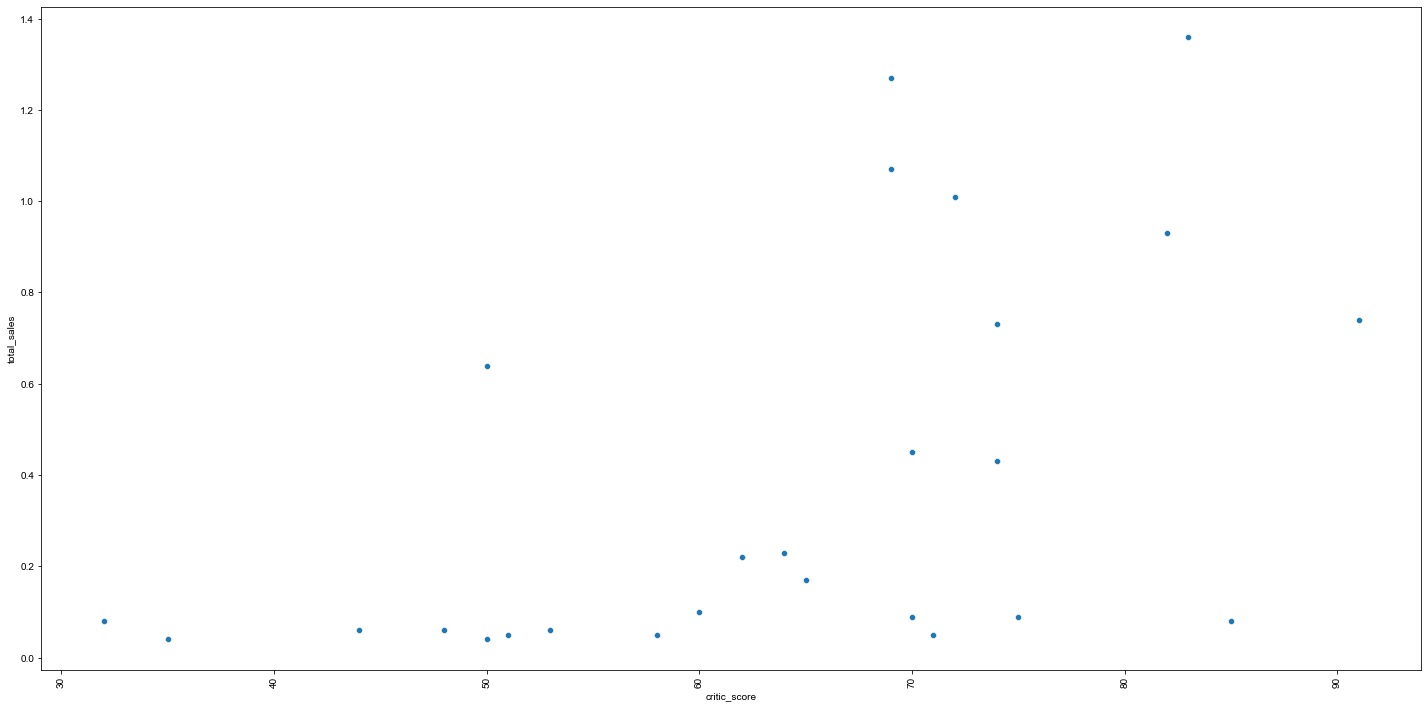

Корреляция равна: 0.525722835658152


In [32]:
reviews(data_rating, 'platform', 'critic_score', 'total_sales', 'X360')

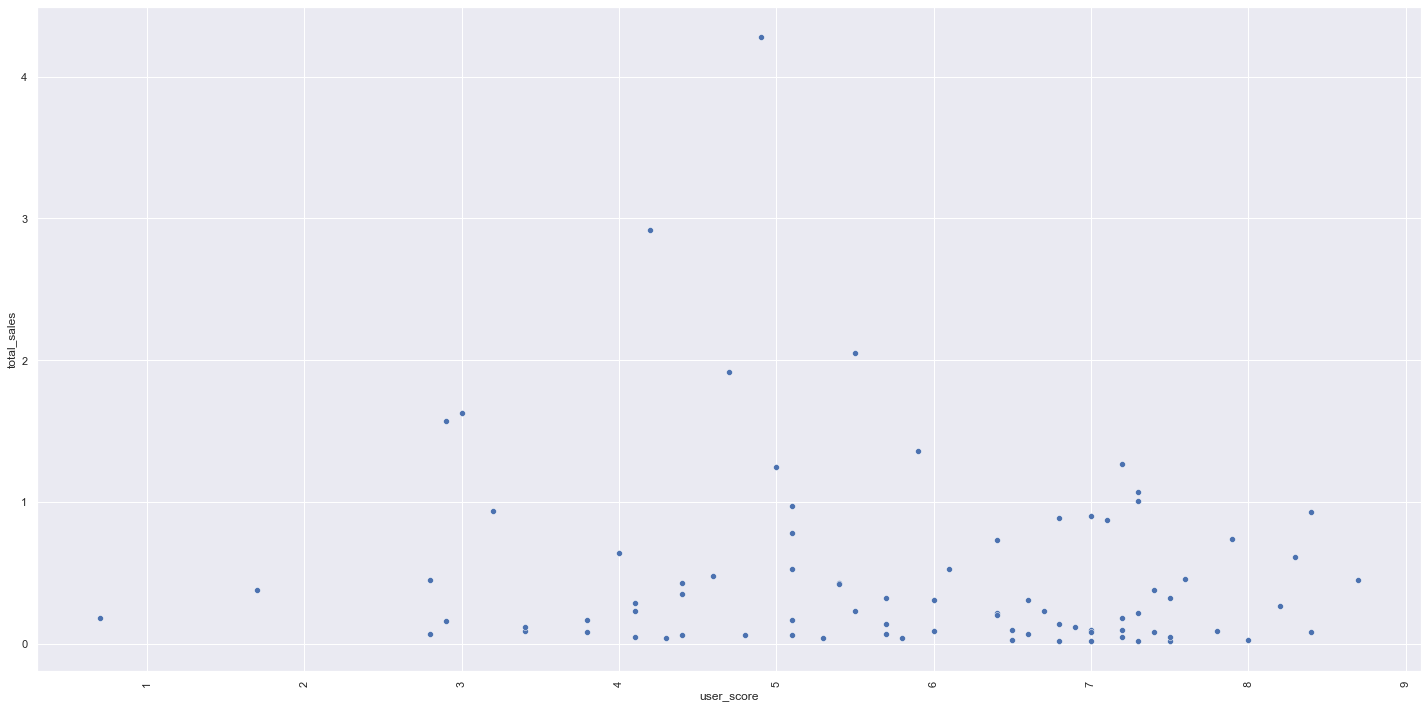

Корреляция равна: -0.1384445709456651


In [33]:
reviews(data_rating, 'platform', 'user_score', 'total_sales', 'X360')

Диаграммы рассеивания и корреляция показывают, что продажи имеют зависимость с рейтингами специалистов 0,338: чем выше рейтингм, тем выше продажи. И совсем незначительную связь с рейтингами от пользователей, всего 0,064

Для PS4

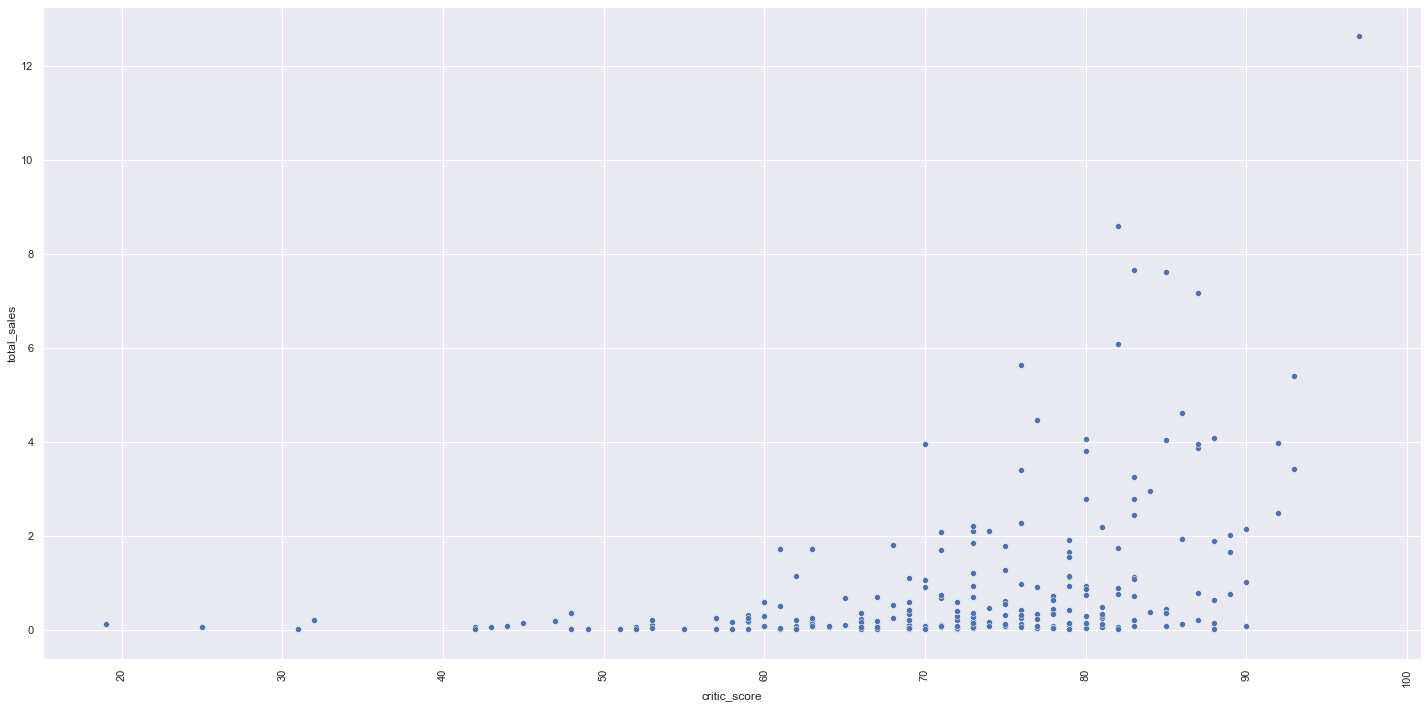

Корреляция равна: 0.40266141068104117


In [34]:
reviews(data_rating, 'platform', 'critic_score', 'total_sales', 'PS4')

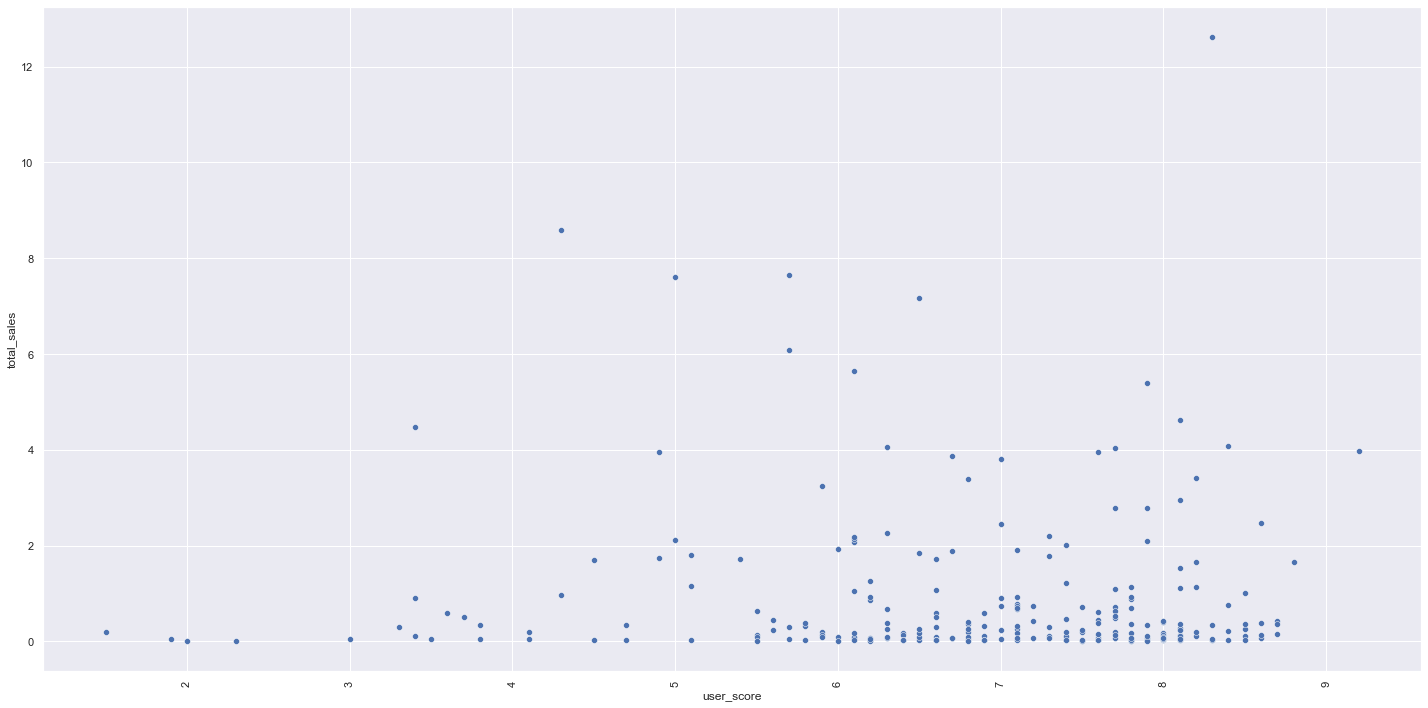

Корреляция равна: -0.0401315894726973


In [35]:
reviews(data_rating, 'platform', 'user_score', 'total_sales', 'PS4')

Для этой платформы картина похожая. Корреляция с рейтингами от специалистов 0,406. А корреляция с рейтингами пользователея так же незначительно и даже со знаком "-" (-0,32)

Для XOne

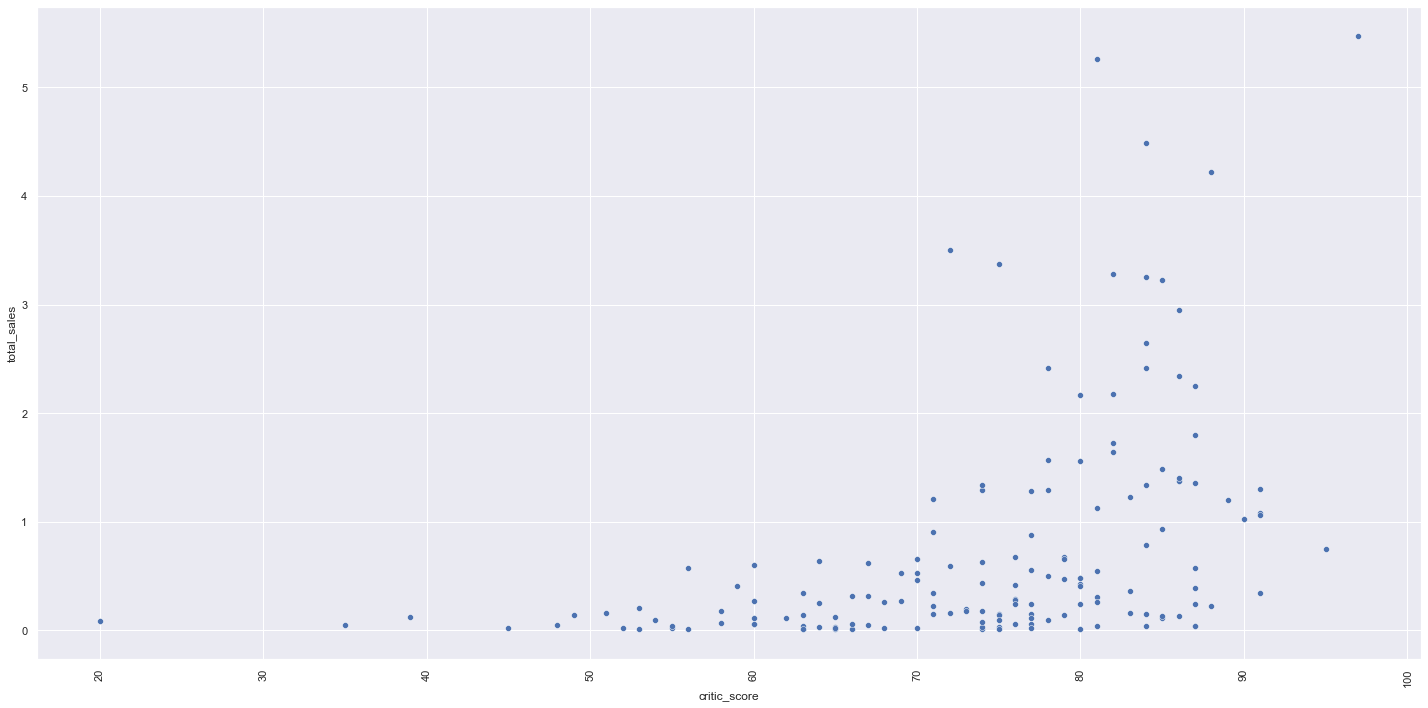

Корреляция равна: 0.4286769437033322


In [36]:
reviews(data_rating, 'platform', 'critic_score', 'total_sales', 'XOne')

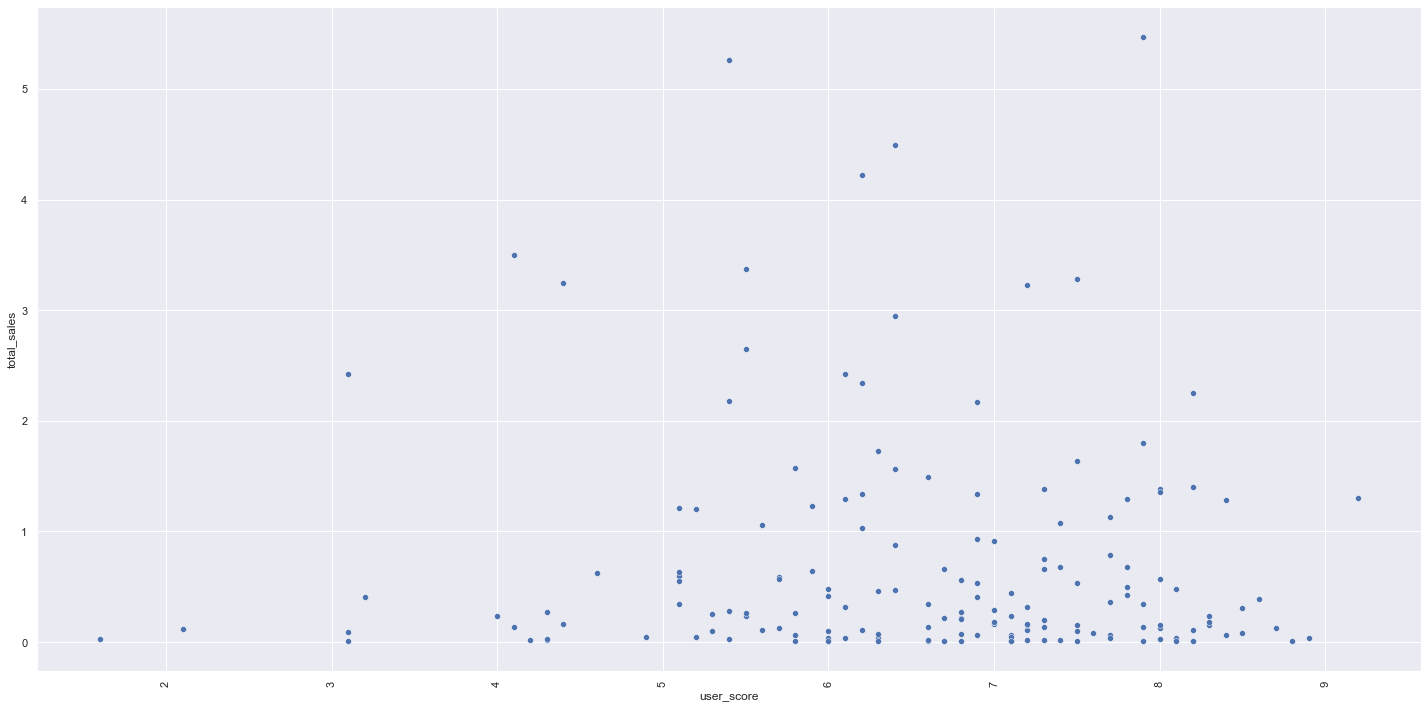

Корреляция равна: -0.0703839280647582


In [37]:
reviews(data_rating, 'platform', 'user_score', 'total_sales', 'XOne')

Для 3DC

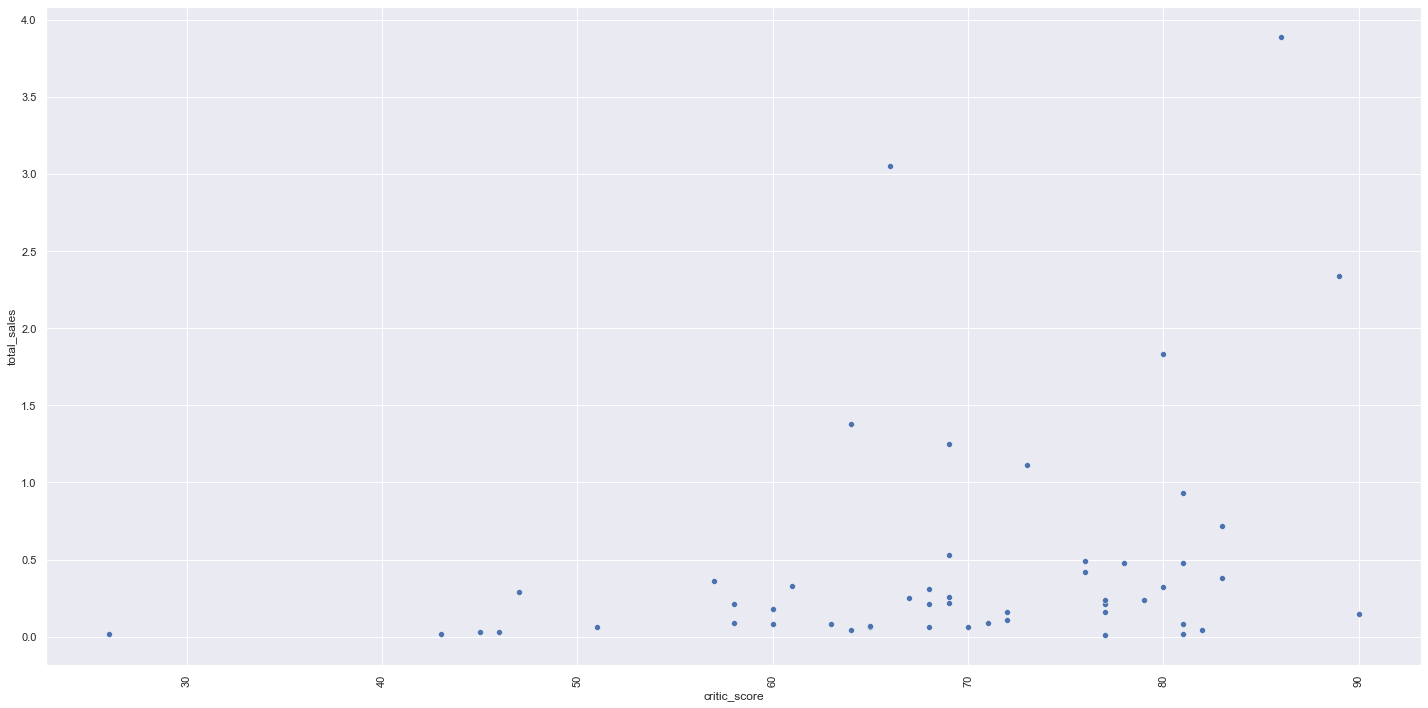

Корреляция равна: 0.314117492869051


In [38]:
reviews(data_rating, 'platform', 'critic_score', 'total_sales', '3DS')

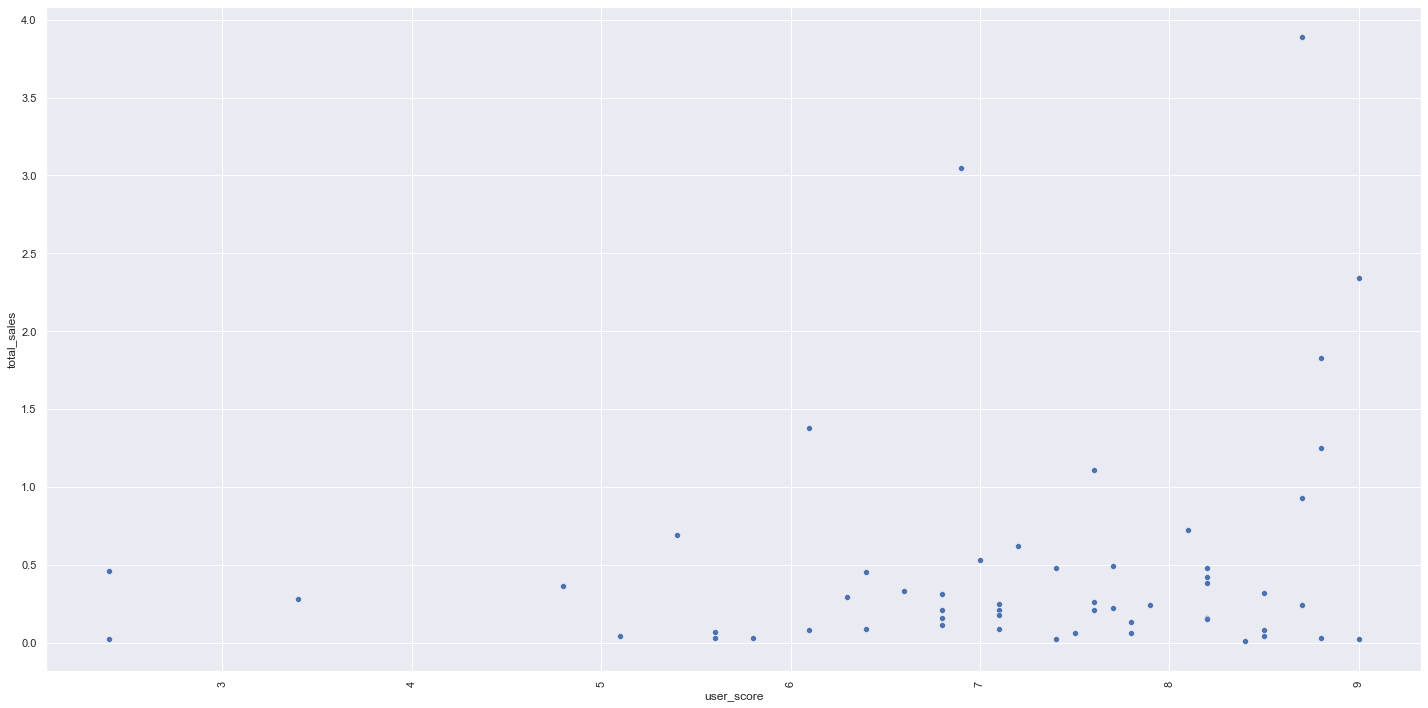

Корреляция равна: 0.21519327185270282


In [39]:
reviews(data_rating, 'platform', 'user_score', 'total_sales', '3DS')

Для XOne картина повторяется: 0,416 и -0,069 соответственно для рейтингов критиков и пользователей.

Мы посмотрели диаграммы рассеяния и вывели корреляцию с отзывами критиков и пользователей для нескольких платформ. 

Можно сказать, что оценки критиков показывают прямую средне-слабую корреляцию продажами платформ (0,2 - 0,5). Оценки пользователей не имеют корреляции с продажами.

Посмотрим на общее распределение игр по жанрам. Сделаем сортировки по количеству игр и по продажам:

In [40]:
data_rating.groupby(data_rating.genre)['name'].count().sort_values(ascending=False)

genre
Action          620
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: name, dtype: int64

In [41]:
data_rating.groupby(data_rating.genre)['total_sales'].sum().sort_values(ascending=False)

genre
Action          199.71
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64

Чем больше игр в жанре, тем больше продаж. Очередность жанров практически повторяется и по количеству игр, и по продажам.  

In [42]:
data_rating.groupby(data_rating.genre)['total_sales'].mean().sort_values(ascending=False)

genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Racing          0.398841
Misc            0.332301
Action          0.322113
Simulation      0.298409
Puzzle          0.157857
Strategy        0.107027
Adventure       0.094865
Name: total_sales, dtype: float64

Из этой сортировки по медианным значениям видим, что максимальную прибыль приносят Шутеры, хоть по количеству игр они отстают от других платформ.

#### Вывод

В ходе нашего исследования мы выснили следующее:

Средний цикл платформы на рынке 5-7 лет.

Рейтинги критиков имею прямую средне-слабую корреляцию с продажами.

Рейтинги пользователей не имеют корреляции с продажами.

Самыми прибыльными являются игры из жанра Шутеров.

Мы подготовили сводную таблицу с ТОП10 платформ в последние годы для дальнейшего анализа.

### 4. Составим портрет пользователя каждого региона

Напишем функцию для формирования сводной информации по заданным параметрам.  На выходе мы будем получать: ТОП5 платформ, доля каждой платформы в общих продажах и распределение рейтинга ESRB.

In [43]:
def user_portrait(df, platform, genre, region, rating):
    df = df[[platform, genre, region, rating]]
    # сформируем таблицу с топ5 платформ в регионе
    platform_top = df.pivot_table(index=platform, values=region, aggfunc='sum').nlargest(5, region).index
    print('Топ 5 платформ в регионе:')
    print(platform_top)
    df_platform_top = df.query('platform in @platform_top')
    sales = df[region].sum()  
    share_of_sales = df_platform_top.groupby(platform)[region].sum() / sales # считаем долю каждой платформы в общих продажах
    print('Доля каждой платформы в общих продахах ')
    print(share_of_sales)
    # сформируем таблицу с топ5 жанрами в регионе и посмотрим как респределяется рейтинг ESRB
    genre_top = df.pivot_table(index=genre, values=region, aggfunc='sum').nlargest(5, region).index
    print(genre_top)
    df_genre_top = df.query('genre in @genre_top')
    print('Распределение рейтинга ESRB на продажи в регионе')
    print(df_genre_top.groupby(rating)[genre].count())
    
    return 

Выведем сводную информацию по Северной Америке:

In [44]:
user_portrait(data_rating, 'platform', 'genre', 'na_sales', 'rating')

Топ 5 платформ в регионе:
Index(['PS4', 'XOne', 'X360', '3DS', 'PS3'], dtype='object', name='platform')
Доля каждой платформы в общих продахах 
platform
3DS     0.079685
PS3     0.077608
PS4     0.347072
X360    0.099606
XOne    0.286041
Name: na_sales, dtype: float64
Index(['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc'], dtype='object', name='genre')
Распределение рейтинга ESRB на продажи в регионе
rating
E          144
E10+       141
M          242
T          199
unknown    517
Name: genre, dtype: int64


Самая популярная платформа в Северной Америке PS4 на 2 и 3 месте с большим отставанием идут XOne и X360.

Самый популярный рейтинг М - Для взрослых (от 17 лет). Следом идет Т - подростки от 13 лет.

Выведем сводную информацию по Европе:

In [45]:
user_portrait(data_rating, 'platform', 'genre', 'eu_sales', 'rating')

Топ 5 платформ в регионе:
Index(['PS4', 'XOne', 'PS3', 'PC', '3DS'], dtype='object', name='platform')
Доля каждой платформы в общих продахах 
platform
3DS     0.059499
PC      0.067250
PS3     0.094268
PS4     0.479976
XOne    0.170708
Name: eu_sales, dtype: float64
Index(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing'], dtype='object', name='genre')
Распределение рейтинга ESRB на продажи в регионе
rating
E          177
E10+       124
M          239
T          187
unknown    472
Name: genre, dtype: int64


Самая популярная платформа в Европе PS4 на 2 и 3 месте идут XOne и PS3.

Самый популярный рейтинг М - для взрослых (от 17 лет). Следом идет Т - подростки от 13 лет. 

Выведем сводную информацию по Японии:

In [46]:
user_portrait(data_rating, 'platform', 'genre', 'jp_sales', 'rating')

Топ 5 платформ в регионе:
Index(['3DS', 'PS4', 'PSV', 'PS3', 'WiiU'], dtype='object', name='platform')
Доля каждой платформы в общих продахах 
platform
3DS     0.475239
PS3     0.120529
PS4     0.161349
PSV     0.156193
WiiU    0.078526
Name: jp_sales, dtype: float64
Index(['Role-Playing', 'Action', 'Fighting', 'Misc', 'Shooter'], dtype='object', name='genre')
Распределение рейтинга ESRB на продажи в регионе
rating
E           47
E10+       131
M          245
T          209
unknown    510
Name: genre, dtype: int64


Самая популярная платформа в Японии с огромным отрывом 3DS. Следом идут PS4 и PSV.

Самый популярный рейтинг М - для взрослых (от 17 лет). Следом идет Т - подростки от 13 лет.

Просмотрев информацию по трем регионам можно сделать следующее заключение:

В каждом регионе есть свои пристрастия к определнным платформам и свой явный лидер в этом вопросе. При этом обращает на себя внимание тот факт, что в тройке лидеров во всех регионах представлена PS4. 

Распределение рейтинга ESRB практически не меняется в зависимости от региона. На первом месте М - для взрослых (от 17 лет). Следом идет Т - подростки от 13 лет.

### 5. Проверим гипотезы

Гипотеза 1:

H_0: Средний пользовательский рейтинг платформы XOne = Средний пользовательский рейтинг платформы PC`

H_a: Средний пользовательский рейтинг платформы XOne ≠ Средний пользовательский рейтинг платформы PC`

alpha = 0.05  

Используем t-распределение Стьюдента

In [47]:
data_rating = data_rating[(data_rating['user_score'] != 'unknown') & (data_rating['user_score'] != 'tbd')]
data_rating['user_score'] = data_rating['user_score'].astype('float64')

In [48]:
sample_1 = data_rating.query('platform=="XOne"')['user_score']
sample_2 = data_rating.query('platform=="PC"')['user_score']

results = st.ttest_ind(sample_1, sample_2, equal_var = False)  #    вызов метода для проверки гипотезы
alpha = 0.05 # зададим значение уровня значимости

print(results.pvalue) # вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.13923712043548309
Не получилось отвергнуть нулевую гипотезу


Можно сделать вывод, что значимые расхождения в средних на разных платформах  не обнаружены, так как p-value больше выбранного уровня значимости (0,05).

Мы не отвергаем гипотезу, что средние пользовательские рейтинги платформ равны на уровне значимости 0,05 на имеющихся данных.

Гипотеза 2.

H_0: Средний пользовательский рейтинг жанра Action ≠ Средний пользовательский рейтинг жанра Sports

H_a: Средний пользовательский рейтинг жанра Action = Средний пользовательский рейтинг жанра Sports

alpha = 0.05  



In [49]:
sample_3 = data_rating.query('genre=="Action"')['user_score']
sample_4 = data_rating.query('genre=="Sports"')['user_score']

results = st.ttest_ind(sample_3, sample_4, equal_var = False)  #    вызов метода для проверки гипотезы
alpha = 0.05 # зададим значение уровня значимости

print(results.pvalue) # вывод значения p-value на экран 
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

9.658176026869598e-15
Отвергаем нулевую гипотезу


Можно сделать вывод, что значимые расхождения в средних пользовательских рейтингов на разных жанрах не обнаружены, так как p-value меньше выбранного уровня значимости (0,05)

Мы отвергаем гипотезу, что средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports. И принимаем альтернативную гипотезу:

Средний пользовательский рейтинг жанра Action равен Среднему пользовательскому рейтингу жанра Sports.


## Вывод


Мы провели предобработку данных и подготовили их для дальнейшего анализа. 

Были удалены пропуски, проверены дубликаты, изменены типы данных, изучены непонятные данные и сформирован дополнительный столбец, который будет необходим в дальнейшей работе.

Основные причины появления пропусков и дубликатов:

человеческий фактор, выходы релизов под теми же названиями, но на других платформах и в другие годы. 

Так же отдельно хотелось бы отметить, что появление пропусков в столбце rating может быть связано с расположением рейтингового агенства в США и, что могло повлиять на обработку данных, которые в меньше мерей интересовали сотрудников агенстВ ходе нашего исследования мы выснили следующее:

В ходе исследования были получены следующие результаты:
Средний цикл платформы на рынке 5-7 лет.  Исходя из этой информации и использовали данные с 2014 года.


Были выявлены ТОП 10  платформ по продажам за эти годы:
'PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP'


Построив диаграммы рассеивания и выведя корреляцию мы выявили, что:


Рейтинги критиков имею прямую средне-слабую корреляцию с продажами (0,2 - 0,5).

Рейтинги пользователей не имеют корреляции с продажами.

Построив график "ящик с усами" для платформ из ТОП 10 мы вяснили, что по верхниму квартилю у нас есть лидеры: Wii (0,755), PS4(0.69) и XOne(0.6325) при этом средние медианные значения находятся приблизительно на одном уровне. Верхняя границы самые большие у PS4 (14.63) и 3DS (11.68).


Самыми прибыльными являются игры из жанра Шутеров.


Мы подготовили сводную таблицу с ТОП10 платформ в последние годы для дальнейшего анализа.


В каждом регионе есть свои пристрастия к определнным платформам и свой явный лидер в этом вопросе. 

В Северной Америке это  PS4, XOne и X360

В Европе - PS4, XOne и PS3

В Японии - 3DS, PS4 и PSV

При этом обращает на себя внимание тот факт, что в тройке лидеров во всех регионах представлена PS4. 
Распределение рейтинга ESRB практически не меняется в зависимости от региона. На первом месте М - для взрослых (от 17 лет). Следом идет Т - подростки от 13 лет.


Портрет пользователя для Северной Америки: взрослый человек от 17 лет, основное предпочтение PS4, XOne и X360


Портрет пользователя для Европы: взрослый человек от 17 лет, основное предпочтение PS4, XOne и PS3


Портрет пользователя для Японии: взрослый человек от 17 лет, основное предпочтение 3DS, PS4 и PSV


Проверили две гипотезы методом t-распределение Стьюдента. Были получены следующие выводы:


1. Значимые расхождения в средних на разных платформах  не обнаружены, так как p-value больше выбранного уровня значимости (0,05).
Мы не отвергаем гипотезу, что средние пользовательские рейтинги платформ равны на уровне значимости 0,05 на имеющихся данных.


2. Значимые расхождения в средних пользовательских рейтингов на разных жанрах не обнаружены, так как p-value меньше выбранного уровня значимости (0,05)

Мы отвергаем гипотезу, что средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports. И принимаем альтернативную гипотезу:

Средний пользовательский рейтинг жанра Action равен Среднему пользовательскому рейтингу жанра Sports.

**Подведем итог:**

Для продвиженя в 2017 году можно взять три основные платформы:  PS4, XOne и 3DS, при этом в Северной Америке основной упор на продвижение на первые две, а в Японии на 3DS. Основная возростная группа это взрослые люди от 17 лет. Именно на них нужно направить основную рекламу. Так же имеет смысл уделить внимание отзывам специалистов, это косвенно может помочь продвижению продукта.

